In [107]:
#!/usr/bin/env python
# -*-coding:utf-8 -*-
'''
@File    :   assignment_6_Weather.ipynb
@Time    :   2024/11/12 18:22:05
@Author  :   Guillermo Martin
@Version :   1.0
@Personal email : gfmg1992@hotmail.com
@Student email: G00438885@atu.ie
@License :   (C)Copyright 2023, Guillermo Martin
@Desc    :   Assignment 6 - Weather Analysis
'''


'\n@File    :   assignment_6_Weather.ipynb\n@Time    :   2024/11/12 18:22:05\n@Author  :   Guillermo Martin\n@Version :   1.0\n@Personal email : gfmg1992@hotmail.com\n@Student email: G00438885@atu.ie\n@License :   (C)Copyright 2023, Guillermo Martin\n@Desc    :   Assignment 6 - Weather Analysis\n'

In [108]:
import pandas as pd 
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt 

In [109]:
url = 'https://cli.fusio.net/cli/climate_data/webdata/hly4935.csv'
df = pd.read_csv(url, skiprows=23) 

C:\Users\Owner\AppData\Local\Temp\ipykernel_1700\3910371570.py:2: DtypeWarning: Columns (2,10,12,14,15,16,18,19,20) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(url, skiprows=23)


In [110]:
df.head
df['date']
df['date'] = pd.to_datetime(df['date'])

C:\Users\Owner\AppData\Local\Temp\ipykernel_1700\2994451338.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['date'] = pd.to_datetime(df['date'])


In [111]:
# Changing date format
df['date'] = pd.to_datetime(df['date'])
#df.head()

In [112]:
df['Day']=df['date'].dt.strftime("%d")
df['Month']=df['date'].dt.strftime("%m")
df['Year']=df['date'].dt.strftime("%Y")

# Temperature Data Plot

In [113]:
# Average temperature each day:
# Average temperature per month
#df.groupby(['Day', 'Month']).agg({'temp': 'mean'}).reset_index()
df['Day_mean'] = df.groupby(['Day', 'Month','Year'])['temp'].transform('mean')
df['Month_mean'] = df.groupby(['Year', 'Month'])['temp'].transform('mean')

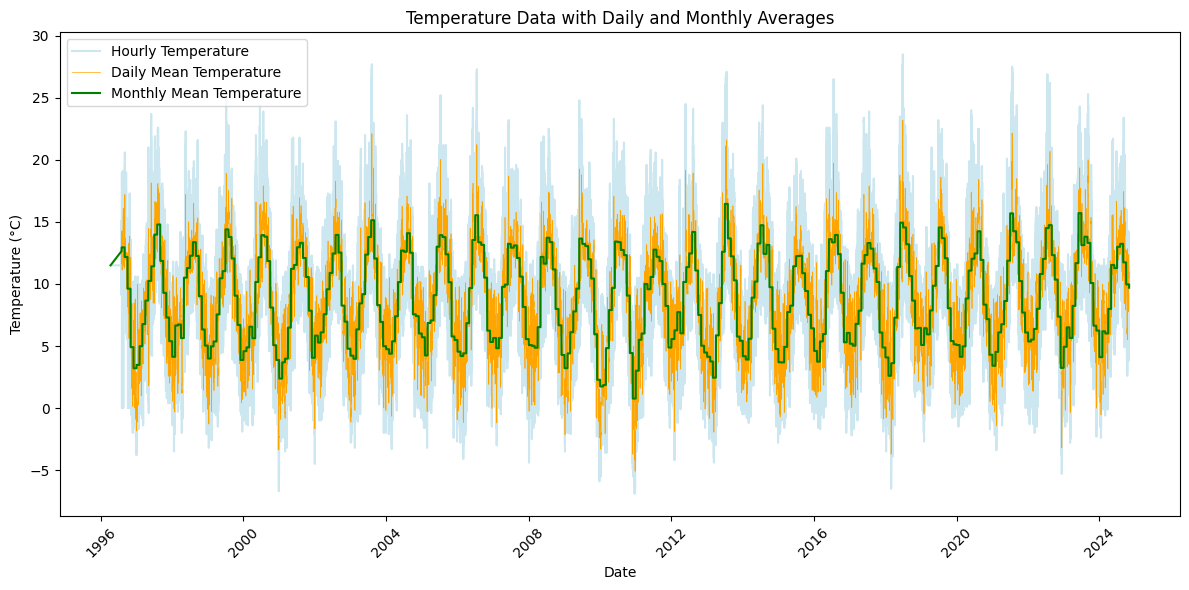

In [114]:
#To check in a given year
#df_1996 = df[df['Year'] == '1996']

# Plotting
fig, ax = plt.subplots(figsize=(12, 6))

# Daily temperature data
ax.plot(df['date'], df['temp'], label='Hourly Temperature', color='lightblue', alpha=0.6)

# Daily mean temperature
ax.plot(df['date'], df['Day_mean'], label='Daily Mean Temperature', color='orange',linewidth=.5)

# Monthly mean temperature
ax.plot(df['date'], df['Month_mean'], label='Monthly Mean Temperature', color='green')

# Formatting the plot
ax.set_xlabel("Date")
ax.set_ylabel("Temperature (°C)")
ax.set_title("Temperature Data with Daily and Monthly Averages")
ax.legend(loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Wind plot

In [116]:
df.shape

(247674, 26)

In [117]:
df['wdsp'] = pd.to_numeric(df['wdsp'], errors='coerce')

In [127]:
df['date']

0        1996-04-10 14:00:00
1        1996-07-31 08:00:00
2        1996-07-31 09:00:00
3        1996-07-31 10:00:00
4        1996-07-31 11:00:00
                 ...        
247669   2024-10-31 20:00:00
247670   2024-10-31 21:00:00
247671   2024-10-31 22:00:00
247672   2024-10-31 23:00:00
247673   2024-11-01 00:00:00
Name: date, Length: 247674, dtype: datetime64[ns]

In [ ]:
# Max Wid Speed
df['Day_max_wdsp'] = df.groupby(['Day', 'Month','Year'])['wdsp'].transform('max')

#The monthly mean of the daily max windspeeds
df['Mean_Month_max_wdsp'] = df.groupby(['Year', 'Month'])['Day_max_wdsp'].transform('mean')

#Rolling average every 24 hours
df['windspeed_rolling_24h'] = df['wdsp'].rolling(24).mean()

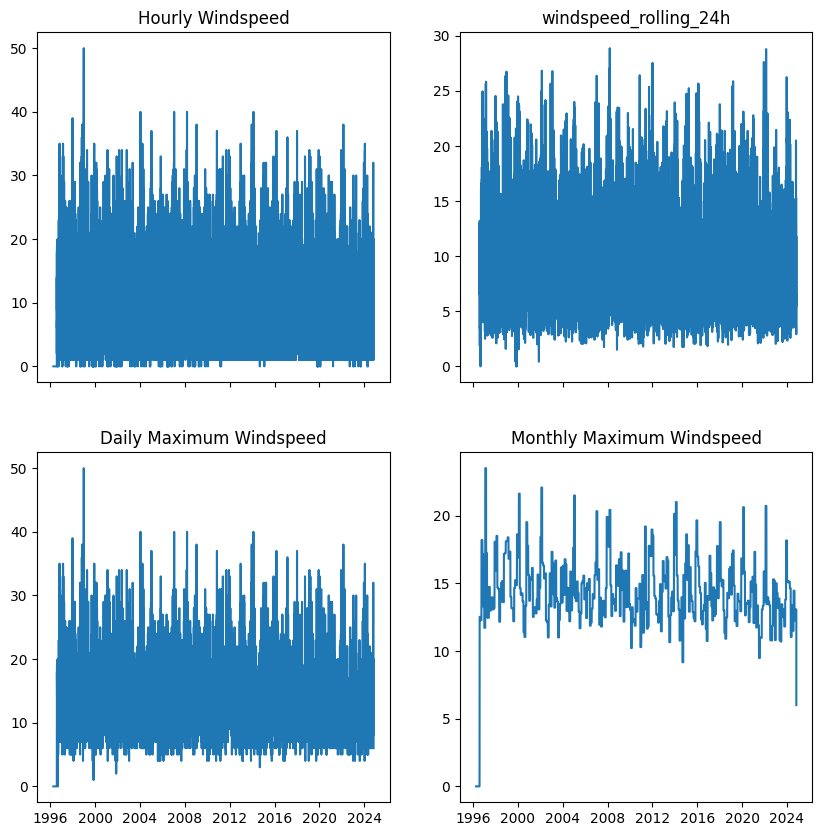

In [ ]:
# Plotting
fig, ((ax1, ax2), (ax3,ax4)) = plt.subplots(2, 2, figsize=(10, 10), sharex=True)

# Daily windpseed data
ax1.plot(df['date'], df['wdsp'], label='Hourly Windspeed')
ax1.set_title("Hourly Windspeed")

# Rolling average of windspeed every 24 hours
ax2.plot(df['date'], df['windspeed_rolling_24h'], label='Monthly Mean Temperature')
ax2.set_title("Windspeed Rolling Average (24h)")

# Daily maximum windspeed
ax3.plot(df['date'], df['Day_max_wdsp'], label='Daily Maximum Windspeed')
ax3.set_title("Daily Maximum Windspeed")

# Monthly mean of the daily max windspeeds
ax4.plot(df['date'], df['Mean_Month_max_wdsp'], label='Daily Maximum Windspeed')
ax4.set_title("Monthly Maximum Windspeed")

plt.show()